In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
import spacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.sparse import hstack
import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("final_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36016 entries, 0 to 36015
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ACCIDENT_TYPE        36016 non-null  object 
 1   ACTIVITY_CD          36016 non-null  float64
 2   CAL_QTR              36016 non-null  int64  
 3   CAL_YR               36016 non-null  int64  
 4   COAL_METAL_IND       36016 non-null  object 
 5   DAYS_LOST            36016 non-null  float64
 6   DAYS_RESTRICT        36016 non-null  float64
 7   DEGREE_INJURY_CD     36016 non-null  float64
 8   DOCUMENT_NO          36016 non-null  int64  
 9   EQUIP_MFR_CD         36016 non-null  float64
 10  FIPS_STATE_CD        36016 non-null  int64  
 11  FISCAL_QTR           36016 non-null  int64  
 12  FISCAL_YR            36016 non-null  int64  
 13  INJ_BODY_PART_CD     36016 non-null  float64
 14  INJURY_SOURCE_CD     36016 non-null  float64
 15  JOB_EXPER            36016 non-null 

In [46]:
df.head(1)

,ACCIDENT_TYPE,ACTIVITY_CD,CAL_QTR,CAL_YR,COAL_METAL_IND,DAYS_LOST,DAYS_RESTRICT,DEGREE_INJURY_CD,DOCUMENT_NO,EQUIP_MFR_CD,...,OCCUPATION_CD,SCHEDULE_CHARGE,SUBUNIT_CD,TOT_EXPER,UG_LOCATION_CD,UG_MINING_METHOD_CD,NARRATIVE,CLASSIFICATION,tokens,processed_narrative
0,0,26,2,14,0,0.0,0.0,6,76,80,...,88,0,7,8.77,3,3,ee was moving a caustic line when the line fel...,HANDLING OF MATERIALS,"[ee, moving, caustic, line, line, fell, splash...",ee moving caustic line line fell splashed chem...


In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
# Dataframe df with the column narrative containing the sentence
df["tokens"] = df["NARRATIVE"].apply(lambda text: [token.text for token in nlp(text) if not token.is_stop])

In [7]:
# Convert the tokenized text back together
df["processed_narrative"] = df["tokens"].apply(lambda tokens: ' '.join(tokens))

In [ ]:
# Separate features (tokenized text) and target (accident classification)
X = df["processed_narrative"]
y = df["CLASSIFICATION"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data (e.g., using TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_vec)

Accuracy: 0.859800111049417
                                  precision    recall  f1-score   support

                      ELECTRICAL       0.95      0.30      0.46        69
                      ENTRAPMENT       1.00      0.82      0.90        50
EXPLODING VESSELS UNDER PRESSURE       0.00      0.00      0.00        35
  EXPLOSIVES AND BREAKING AGENTS       0.00      0.00      0.00         7
                  FIRE/EXPLOSION       0.91      0.85      0.88       159
           HANDLING OF MATERIALS       0.85      0.97      0.90      4523
                         HAULAGE       0.93      0.51      0.66       760
                      INUNDATION       0.93      0.52      0.67        27
                           OTHER       0.92      0.27      0.42       164
          SLIP OR FALL OF PERSON       0.87      0.83      0.85      1403
                           TOXIC       0.00      0.00      0.00         7

                        accuracy                           0.86      7204
        

C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


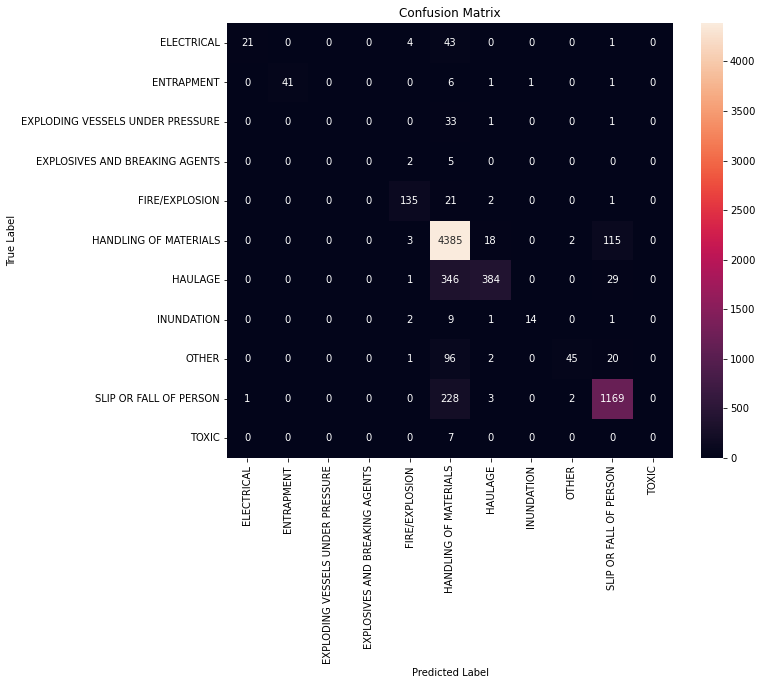

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


# Print confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

#pd.crosstab(y_test, y_pred, margins=True, margins_name="Total")

# Display colored confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [22]:
categorical_columns = df.drop(["processed_narrative","tokens","CLASSIFICATION","NARRATIVE"],axis =1).select_dtypes(include='object').columns
categorical_columns

Index(['ACCIDENT_TYPE', 'COAL_METAL_IND'], dtype='object')

In [23]:
# Separate features (tokenized text) and target (accident classification)
X_text = df["processed_narrative"]
X_text_vec = vectorizer.transform(X_text)

#UG_LOCATION, UG_MINING_METHOD, UG_MINING_METHOD, MINING_EQUIP, EQUIP_MFR_NAME,IMMED_NOTIFY_CD,IMMED_NOTIFY

# Select multiple categorical columns
#categorical_columns = df.drop(["NARRATIVE","IMMED_NOTIFY","IMMED_NOTIFY_CD","EQUIP_MFR_NAME","MINING_EQUIP","UG_MINING_METHOD","UG_MINING_METHOD","UG_LOCATION","processed_narrative","tokens","CLASSIFICATION"],axis =1).select_dtypes(include='object').columns

# One-hot encode the categorical columns
encoder = OneHotEncoder(handle_unknown="ignore")
X_categorical = encoder.fit_transform(df[categorical_columns])

# Combine text and categorical features
X_combined = hstack((X_text_vec, X_categorical))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9094947251526929
                                  precision    recall  f1-score   support

                      ELECTRICAL       0.98      0.77      0.86        69
                      ENTRAPMENT       0.98      0.88      0.93        50
EXPLODING VESSELS UNDER PRESSURE       0.00      0.00      0.00        35
  EXPLOSIVES AND BREAKING AGENTS       0.00      0.00      0.00         7
                  FIRE/EXPLOSION       0.89      0.92      0.90       159
           HANDLING OF MATERIALS       0.90      0.97      0.94      4523
                         HAULAGE       0.93      0.61      0.74       760
                      INUNDATION       0.95      0.78      0.86        27
                           OTHER       0.97      0.70      0.81       164
          SLIP OR FALL OF PERSON       0.91      0.94      0.92      1403
                           TOXIC       0.00      0.00      0.00         7

                        accuracy                           0.91      7204
       

C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# Separate features (tokenized text) and target (accident classification)
X_text = df["processed_narrative"]
X_text_vec = vectorizer.transform(X_text)

# One-hot encode the categorical columns
encoder = OneHotEncoder(handle_unknown="ignore")
X_categorical = encoder.fit_transform(df[categorical_columns])

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
X_numerical = df[numerical_columns]

# Combine text and categorical features
X_combined = hstack((X_text_vec, X_categorical, X_numerical))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9122709605774569
                                  precision    recall  f1-score   support

                      ELECTRICAL       1.00      0.65      0.79        69
                      ENTRAPMENT       0.98      0.86      0.91        50
EXPLODING VESSELS UNDER PRESSURE       0.00      0.00      0.00        35
  EXPLOSIVES AND BREAKING AGENTS       0.00      0.00      0.00         7
                  FIRE/EXPLOSION       0.88      0.90      0.89       159
           HANDLING OF MATERIALS       0.90      0.98      0.94      4523
                         HAULAGE       0.97      0.62      0.76       760
                      INUNDATION       0.96      0.81      0.88        27
                           OTHER       0.99      0.73      0.84       164
          SLIP OR FALL OF PERSON       0.92      0.93      0.93      1403
                           TOXIC       0.00      0.00      0.00         7

                        accuracy                           0.91      7204
       

C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Confusion Matrix:
[[  45    0    0    0    6   17    0    0    0    1    0]
 [   0   43    0    0    6    0    0    1    0    0    0]
 [   0    0    0    0    0   33    1    0    0    1    0]
 [   0    0    0    0    2    5    0    0    0    0    0]
 [   0    0    0    0  143   16    0    0    0    0    0]
 [   0    0    0    0    2 4420   12    0    1   88    0]
 [   0    0    0    0    0  268  470    0    0   22    0]
 [   0    1    0    0    4    0    0   22    0    0    0]
 [   0    0    0    0    0   38    0    0  119    7    0]
 [   0    0    0    0    0   93    0    0    0 1310    0]
 [   0    0    0    0    0    7    0    0    0    0    0]]


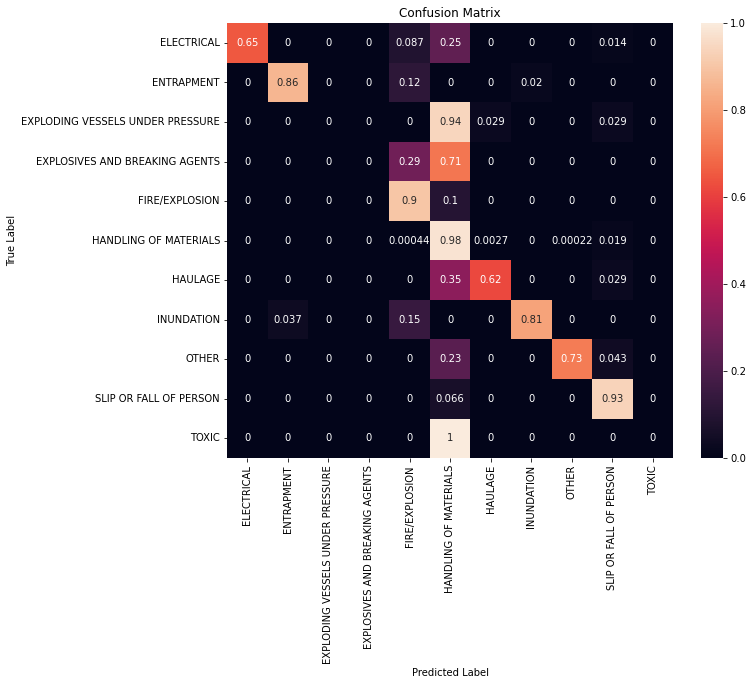

In [32]:
# Print confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

# Display colored confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_matrix, annot=True, xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [40]:
# Get the feature names for the text data
text_feature_names = vectorizer.get_feature_names_out()

# Get the feature names for the one-hot encoded categorical features
categorical_feature_names = encoder.get_feature_names(input_features=categorical_columns).tolist()

# Get the numerical feature names
numerical_feature_names = numerical_columns.tolist()

# Create separate dictionaries for feature importances of each data type
text_feature_importances = dict(zip(text_feature_names, feature_importances[:len(text_feature_names)]))
categorical_feature_importances = dict(zip(categorical_feature_names, feature_importances[len(text_feature_names):len(text_feature_names) + len(categorical_feature_names)]))
numerical_feature_importances = dict(zip(numerical_feature_names, feature_importances[len(text_feature_names) + len(categorical_feature_names):]))
"""
# Print the feature importances for text data
print("Feature Importances (Text Data):")
for feature, importance in text_feature_importances.items():
    print(f"{feature}: {importance}")"""

# Print the feature importances for categorical data
print("\nFeature Importances (Categorical Data):")
for feature, importance in categorical_feature_importances.items():
    print(f"{feature}: {importance}")

# Print the feature importances for numerical data
print("\nFeature Importances (Numerical Data):")
for feature, importance in numerical_feature_importances.items():
    print(f"{feature}: {importance}")


Feature Importances (Categorical Data):
ACCIDENT_TYPE_Absorption of radiations, caustics, toxic and noxious substances: 0.0006566095320560297
ACCIDENT_TYPE_Accident type, without injuries: 0.008990153177210526
ACCIDENT_TYPE_Bodily reaction, NEC: 0.004454448394665901
ACCIDENT_TYPE_Caught in, under or between NEC: 0.0009792053542140838
ACCIDENT_TYPE_Caught in, under or between a moving and a stationary object: 0.0029890007933156704
ACCIDENT_TYPE_Caught in, under or between running or meshing objects: 0.00039634181728502533
ACCIDENT_TYPE_Caught in, under or between two or more moving objects: 6.308185015212031e-05
ACCIDENT_TYPE_Contact with electrical current: 0.0022491663756758744
ACCIDENT_TYPE_Contact with heat: 0.0
ACCIDENT_TYPE_Contact with hot objects or substances: 0.0005028669310561053
ACCIDENT_TYPE_Drowning: 4.761810557041728e-06
ACCIDENT_TYPE_Fall down raise, shaft or manway: 2.1863676129877306e-05
ACCIDENT_TYPE_Fall down stairs: 0.0007711939742847244
ACCIDENT_TYPE_Fall from hea

In [49]:
# Encode categorical columns as simple numerical labels not dummy variable
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features (text data and numerical) and target (accident classification)
X_text = df["processed_narrative"]
X_categorical = df[categorical_columns]
X_numerical = df[numerical_columns]
y = df["CLASSIFICATION"]

# Vectorize the text data (e.g., using TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_text_vec = vectorizer.fit_transform(X_text)

# Combine text and numerical features
from scipy.sparse import hstack
X_combined = hstack((X_text_vec, X_categorical, X_numerical))

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8918656302054414
                                  precision    recall  f1-score   support

                      ELECTRICAL       1.00      0.23      0.38        69
                      ENTRAPMENT       0.96      0.90      0.93        50
EXPLODING VESSELS UNDER PRESSURE       0.00      0.00      0.00        35
  EXPLOSIVES AND BREAKING AGENTS       0.00      0.00      0.00         7
                  FIRE/EXPLOSION       0.88      0.90      0.89       159
           HANDLING OF MATERIALS       0.88      0.98      0.93      4523
                         HAULAGE       0.98      0.59      0.74       760
                      INUNDATION       0.95      0.74      0.83        27
                           OTHER       0.98      0.39      0.56       164
          SLIP OR FALL OF PERSON       0.91      0.90      0.90      1403
                           TOXIC       0.00      0.00      0.00         7

                        accuracy                           0.89      7204
       

C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# Get feature importances
feature_importances = rf_model.feature_importances_
# Combine all feature names
feature_names = categorical_columns.tolist() + numerical_columns.tolist() # +vectorizer.get_feature_names_out()

# Create a dictionary to associate feature names with their importances
feature_importances_dict = dict(zip(feature_names, feature_importances))

# Print the feature importances
print("\nFeature Importances:")
for feature, importance in feature_importances_dict.items():
    print(f"{feature}: {importance}")


Feature Importances:
ACCIDENT_TYPE: 0.00029171879762111965
COAL_METAL_IND: 1.5140379537117276e-05
ACTIVITY_CD: 5.257662056253337e-06
CAL_QTR: 2.756301673023301e-06
CAL_YR: 0.00011789444028198422
DAYS_LOST: 6.372928738991686e-05
DAYS_RESTRICT: 4.193765330369145e-05
DEGREE_INJURY_CD: 0.0
DOCUMENT_NO: 8.965979265911402e-06
EQUIP_MFR_CD: 3.3778784921295094e-06
FIPS_STATE_CD: 1.0165120658207986e-06
FISCAL_QTR: 5.169062994931608e-08
FISCAL_YR: 9.048730878840112e-08
INJ_BODY_PART_CD: 1.4253952339029094e-09
INJURY_SOURCE_CD: 0.0
JOB_EXPER: 9.060431992650061e-06
MINE_EXPER: 1.184711105737149e-07
NATURE_INJURY_CD: 0.0
NO_INJURIES: 9.223712506389497e-06
OCCUPATION_CD: 0.00031611541560344435
SCHEDULE_CHARGE: 1.0479020135872293e-05
SUBUNIT_CD: 1.3446066772410785e-05
TOT_EXPER: 0.0
UG_LOCATION_CD: 1.234605152249545e-06
UG_MINING_METHOD_CD: 1.0248643837901737e-06


In [33]:
df.columns

Index(['ACCIDENT_TYPE', 'ACTIVITY_CD', 'CAL_QTR', 'CAL_YR', 'COAL_METAL_IND',
       'DAYS_LOST', 'DAYS_RESTRICT', 'DEGREE_INJURY_CD', 'DOCUMENT_NO',
       'EQUIP_MFR_CD', 'FIPS_STATE_CD', 'FISCAL_QTR', 'FISCAL_YR',
       'INJ_BODY_PART_CD', 'INJURY_SOURCE_CD', 'JOB_EXPER', 'MINE_EXPER',
       'NATURE_INJURY_CD', 'NO_INJURIES', 'OCCUPATION_CD', 'SCHEDULE_CHARGE',
       'SUBUNIT_CD', 'TOT_EXPER', 'UG_LOCATION_CD', 'UG_MINING_METHOD_CD',
       'NARRATIVE', 'CLASSIFICATION', 'tokens', 'processed_narrative'],
      dtype='object')

In [38]:
#categorical_columns = df.drop(["processed_narrative","tokens","CLASSIFICATION","NARRATIVE"],axis =1).select_dtypes(include='object').columns
#"IMMED_NOTIFY","IMMED_NOTIFY_CD","EQUIP_MFR_NAME","MINING_EQUIP","UG_MINING_METHOD","UG_MINING_METHOD","UG_LOCATION"
categorical_columns = df.drop(["EQUIP_MFR_CD","UG_MINING_METHOD_CD","UG_LOCATION_CD","processed_narrative","tokens","CLASSIFICATION","NARRATIVE","TOT_EXPER","DAYS_RESTRICT","MINE_EXPER","DAYS_LOST"],axis=1).columns
numerical_columns = ["TOT_EXPER","DAYS_RESTRICT","MINE_EXPER","DAYS_LOST"]

In [39]:
# Encode categorical columns as simple numerical labels not dummy variable
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features (text data and numerical) and target (accident classification)
X_text = df["processed_narrative"]
X_categorical = df[categorical_columns]
X_numerical = df[numerical_columns]
y = df["CLASSIFICATION"]

# Vectorize the text data (e.g., using TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_text_vec = vectorizer.fit_transform(X_text)

# Combine text and numerical features
from scipy.sparse import hstack
X_combined = hstack((X_text_vec, X_categorical, X_numerical))

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


Accuracy: 0.892282065519156
                                  precision    recall  f1-score   support

                      ELECTRICAL       1.00      0.23      0.38        69
                      ENTRAPMENT       0.98      0.86      0.91        50
EXPLODING VESSELS UNDER PRESSURE       0.00      0.00      0.00        35
  EXPLOSIVES AND BREAKING AGENTS       0.00      0.00      0.00         7
                  FIRE/EXPLOSION       0.87      0.90      0.89       159
           HANDLING OF MATERIALS       0.88      0.98      0.93      4523
                         HAULAGE       0.97      0.59      0.73       760
                      INUNDATION       0.95      0.78      0.86        27
                           OTHER       1.00      0.37      0.54       164
          SLIP OR FALL OF PERSON       0.91      0.90      0.91      1403
                           TOXIC       0.00      0.00      0.00         7

                        accuracy                           0.89      7204
        

C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.892282065519156
                                  precision    recall  f1-score   support

                      ELECTRICAL       1.00      0.23      0.38        69
                      ENTRAPMENT       0.98      0.86      0.91        50
EXPLODING VESSELS UNDER PRESSURE       0.00      0.00      0.00        35
  EXPLOSIVES AND BREAKING AGENTS       0.00      0.00      0.00         7
                  FIRE/EXPLOSION       0.87      0.90      0.89       159
           HANDLING OF MATERIALS       0.88      0.98      0.93      4523
                         HAULAGE       0.97      0.59      0.73       760
                      INUNDATION       0.95      0.78      0.86        27
                           OTHER       1.00      0.37      0.54       164
          SLIP OR FALL OF PERSON       0.91      0.90      0.91      1403
                           TOXIC       0.00      0.00      0.00         7

                        accuracy                           0.89      7204
        

C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srija\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  16    0    0    0    6   46    0    0    0    1    0]
 [   0   43    0    0    6    0    0    1    0    0    0]
 [   0    0    0    0    0   34    1    0    0    0    0]
 [   0    0    0    0    2    5    0    0    0    0    0]
 [   0    0    0    0  143   15    1    0    0    0    0]
 [   0    0    0    0    2 4429   11    0    0   81    0]
 [   0    0    0    0    0  291  447    0    0   22    0]
 [   0    1    0    0    5    0    0   21    0    0    0]
 [   0    0    0    0    0   83    1    0   61   19    0]
 [   0    0    0    0    0  135    0    0    0 1268    0]
 [   0    0    0    0    0    7    0    0    0    0    0]]


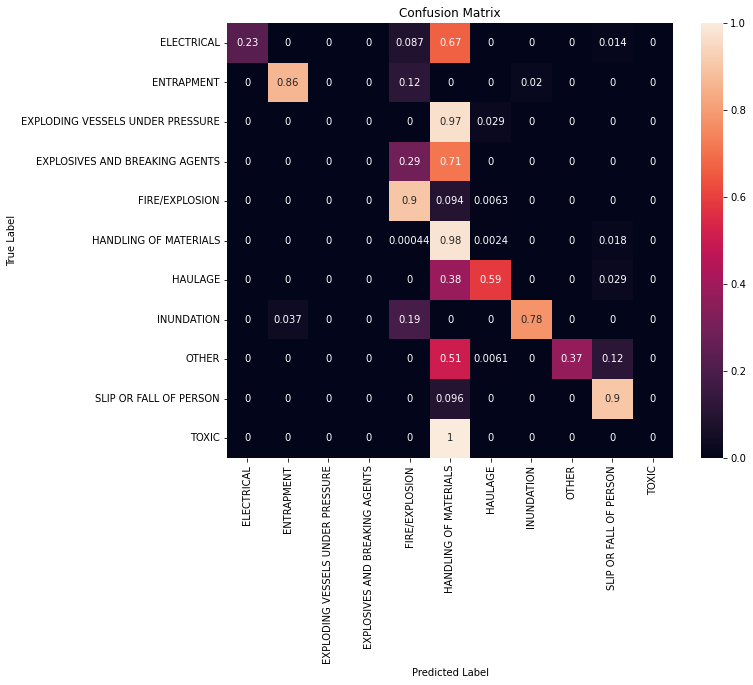

In [47]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

# Display colored confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(norm_conf_matrix, annot=True, xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:

# Convert the tokenized text back to sentences (optional)
df["processed_narrative"] = df["tokens"].apply(lambda tokens: ' '.join(tokens))

# Separate features (tokenized text) and target (accident classification)
X_text = df["processed_narrative"]
X_text_vec = vectorizer.transform(X_text)

#UG_LOCATION, UG_MINING_METHOD, UG_MINING_METHOD, MINING_EQUIP, EQUIP_MFR_NAME,IMMED_NOTIFY_CD,IMMED_NOTIFY

# Select multiple categorical columns
categorical_columns = df.drop(["NARRATIVE","IMMED_NOTIFY","IMMED_NOTIFY_CD","EQUIP_MFR_NAME","MINING_EQUIP","UG_MINING_METHOD","UG_MINING_METHOD","UG_LOCATION","processed_narrative","tokens","CLASSIFICATION"],axis =1).select_dtypes(include='object').columns  # Replace with your actual column names
print(categorical_columns)
# One-hot encode the categorical columns
encoder = OneHotEncoder(handle_unknown="ignore")
X_categorical = encoder.fit_transform(df[categorical_columns])

# Combine text and categorical features
from scipy.sparse import hstack
X_combined = hstack((X_text_vec, X_categorical))

# Separate target variable
y = df["CLASSIFICATION"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))